# REGRESSION : THE SIMPLEST NEURAL NETWORK
Es la red neuronal más sencilla

The actual training of a neural network happens via GRADIENT DESCENT OPTIMIZATION 

Minimizing MSE (Mean Square Error) ---> Smallest posible Value 

# Forward and backward passes

### Optimizer 
uses the error function and tweaks the model parameters to minimize error.



### Forward Pass
Use the current model weights and biases to make a prediction.


### Backward Pass
- Update parameters values based on loss error.
- Allows the weights and biases of neurons to converge to their final values.

# Calculating Gradients Using Gradient Tape
MSE = Mean Square Error of Loss

Loss = y_pred - y_true

# Calculating Gradients
- Symbolic Differentiation : Conceptually simple but hard to implement.
- Numeric Differentiation : Easy to implement but won't scale.
- Automatic Differentiation: Conceptually difficult but easy to implement.

Gradients: vector of partial derivates apply to a specific time t

Parameter(t+1) = Parameter(t) - Learning_rate x Gradient(0)(t)

In [89]:
# Back Propagation is only required during training: in TF2.0, invoke the tape.gradient() method

# Calculating gradients using tf.GradientTape()

import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf

In [90]:
x = tf.Variable(4.0)
with tf.GradientTape() as tape:
    y = x**2

In [91]:
y

<tf.Tensor: shape=(), dtype=float32, numpy=16.0>

In [92]:
dy_dx = tape.gradient(y,x)
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [93]:
# ejercicio de Gradient Descents

In [94]:
w = tf.Variable(tf.random.normal((4,2)))
w

<tf.Variable 'Variable:0' shape=(4, 2) dtype=float32, numpy=
array([[ 0.6240907 , -1.4193867 ],
       [-0.7396271 ,  1.6644269 ],
       [ 0.12126018,  1.5951656 ],
       [ 1.7545447 , -0.04636844]], dtype=float32)>

In [95]:
b = tf.Variable(tf.ones(2, dtype=tf.float32))
b

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 1.], dtype=float32)>

In [96]:
x = tf.Variable([[10.,20.,30.,40.]],dtype=tf.float32)
x

<tf.Variable 'Variable:0' shape=(1, 4) dtype=float32, numpy=array([[10., 20., 30., 40.]], dtype=float32)>

In [97]:
# para invocar GradientTape debe inicializar persistent=True
with tf.GradientTape(persistent=True) as tape:
    y = tf.matmul(x,w) + b

    loss = tf.reduce_mean(y**2)

In [98]:
[d1_dw, d1_db] = tape.gradient(loss, [w,b])

In [99]:
d1_dw # la forma del gradiente es igual al tensor w

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[ 662.67957,  660.9491 ],
       [1325.3591 , 1321.8982 ],
       [1988.0388 , 1982.8473 ],
       [2650.7183 , 2643.7964 ]], dtype=float32)>

In [100]:
d1_db # la forma del bias gradient es igual al bias b

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([66.26796, 66.09491], dtype=float32)>

In [101]:
layer = tf.keras.layers.Dense(2, activation='relu')
x = tf.constant([[10.,20.,30.]])

In [102]:
with tf.GradientTape() as tape:
    y = layer(x)
    loss = tf.reduce_sum(y**2)
grad = tape.gradient(loss, layer.trainable_variables)

# Gradient Tape watches trainable varibles
# Tensors, constants, non-trainable variables are not tracked automatically 

In [103]:
grad

[<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[   0.     ,  695.02856],
        [   0.     , 1390.0571 ],
        [   0.     , 2085.0857 ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 0.     , 69.50285], dtype=float32)>]

In [104]:
x1 = tf.Variable(5.0) # trainable as default
x1

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>

In [105]:
x2 = tf.Variable(5.0, trainable=False) # se puede especificar que no es entrenable
x2

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>

In [106]:
x3 = tf.add(x1,x2)
x3

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [107]:
x4 = tf.constant(5.0)
x4

<tf.Tensor: shape=(), dtype=float32, numpy=5.0>

In [108]:
with tf.GradientTape() as tape:
    y = (x1**2) + (x2**2) + (x3**2) + (x4**2)
grad = tape.gradient(y,[x1,x2,x3,x4])
grad
# Solo calcula el gradiente de x1 porque es el unico trainable de los 4

[<tf.Tensor: shape=(), dtype=float32, numpy=10.0>, None, None, None]

In [109]:
x1 = tf.constant(5.0)
x2 = tf.Variable(3.0)

In [110]:

with tf.GradientTape() as tape:
    tape.watch(x1) # si queremos que tenga en cuenta una variable trainable=False, se debe especificar
    y = (x1**2) + (x2**2)

In [111]:
[dy_dx1, dy_dx2] = tape.gradient(y,[x1,x2])
dy_dx1,dy_dx2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [112]:
with tf.GradientTape(watch_accessed_variables=False) as tape: # se puede revertir ese proceso 
    tape.watch(x1) 
    y = (x1**2) + (x2**2)

In [113]:
[dy_dx1, dy_dx2] = tape.gradient(y,[x1,x2])
dy_dx1,dy_dx2 # vemos que no toma el x2, aunque es trainable

(<tf.Tensor: shape=(), dtype=float32, numpy=10.0>, None)

In [114]:
# GradientTape tracks actual operations
# control flow statements, branches and handled automatically
x = tf.constant(-1.0)
x1 = tf.Variable(5.0)
x2 = tf.Variable(3.0)

with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)

    if x > 0.0:
        result = x1**2
    else:
        result = x2**2

dx1,dx2 = tape.gradient(result, [x1,x2])
dx1,dx2

# como x1 no es parque de ningun calculo, no tiene gradiente

(None, <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [115]:
# GradientTape tracks actual operations
# control flow statements, branches and handled automatically
x = tf.constant(1.0)
x1 = tf.Variable(5.0)
x2 = tf.Variable(3.0)

with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)

    if x > 0.0:
        result = x1**2
    else:
        result = x2**2

dx1,dx2 = tape.gradient(result, [x1,x2])
dx1,dx2

# como x2 no es parque de ningun calculo, no tiene gradiente

(<tf.Tensor: shape=(), dtype=float32, numpy=10.0>, None)

# SIMPLE LINEAR REGRESSION 

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [117]:
# creamos una data verdadedra
w_true = 2
b_true = 0.5

In [118]:
# generamos 130 valores entre 0 y 3
x = np.linspace(0,3,130)
y = w_true*x + b_true + np.random.randn(*x.shape) * 0.5

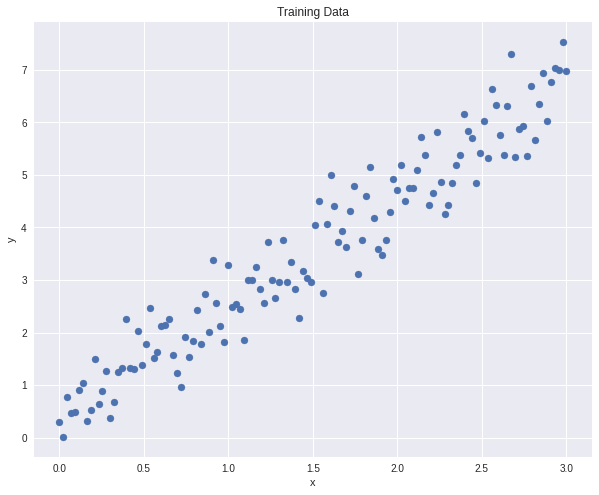

In [119]:
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Data')
plt.show()

In [120]:
class LinearModel:

    def __init__(self):
        self.weight = tf.Variable(np.random.randn(), name = 'w')
        self.bias = tf.Variable(np.random.randn(), name = 'b')
    
    def __call__(self,x):
        return self.weight*x + self.bias

def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y-y_pred))

def train(Linear_Model, x, y, lr=0.01):
    with tf.GradientTape() as tape:
        y_pred = Linear_Model(x)
        current_loss = loss(y,y_pred)
    d_weight, d_bias = tape.gradient(current_loss,[Linear_Model.weight,Linear_Model.bias])
    Linear_Model.weight.assign_sub(lr*d_weight)
    Linear_Model.bias.assign_sub(lr*d_bias)

In [121]:
Linear_Model = LinearModel()
weights, biases = [],[]
epochs = 10
lr = 0.15

In [122]:
# hacemos el entrenamiento por cada epoca

for epoch_count in range(epochs):
    weights.append(Linear_Model.weight.numpy())
    biases.append(Linear_Model.bias.numpy())

    real_loss = loss(y,Linear_Model(x))

    train(Linear_Model, x, y, lr=lr)
    
    print(f'Epochs count {epoch_count}: loss values {real_loss.numpy()}')

Epochs count 0: loss values 19.075191497802734
Epochs count 1: loss values 1.1466991901397705
Epochs count 2: loss values 0.7204077243804932
Epochs count 3: loss values 0.661371648311615
Epochs count 4: loss values 0.6157470345497131
Epochs count 5: loss values 0.5755630135536194
Epochs count 6: loss values 0.5400547981262207
Epochs count 7: loss values 0.5086758732795715
Epochs count 8: loss values 0.48094606399536133
Epochs count 9: loss values 0.4564409852027893


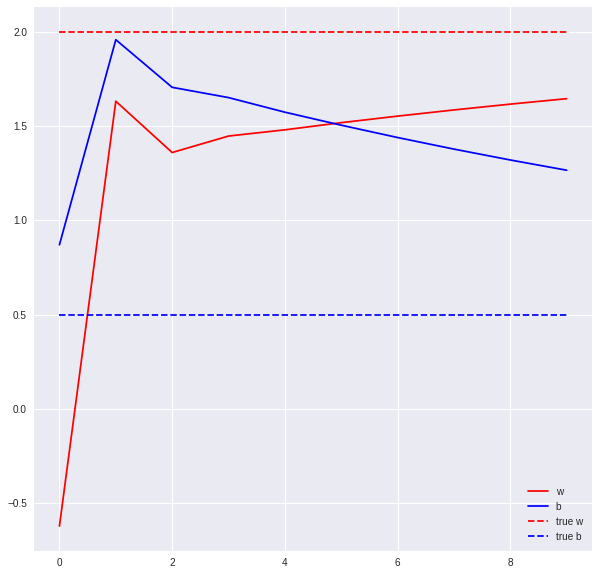

In [123]:
plt.figure(figsize=(10,10))
plt.plot(range(epochs),weights,'r', range(epochs),biases,'b')
plt.plot([w_true]*epochs,'r--',[b_true]*epochs,'b--')
plt.legend(['w','b','true w','true b'])
plt.show()

In [124]:
# los valores de weight y bias obtenidos son 
Linear_Model.weight.numpy(), Linear_Model.bias.numpy()

(1.6729473, 1.2148976)

In [125]:
rmse = loss(y, Linear_Model(x))
rmse.numpy()

0.43478563

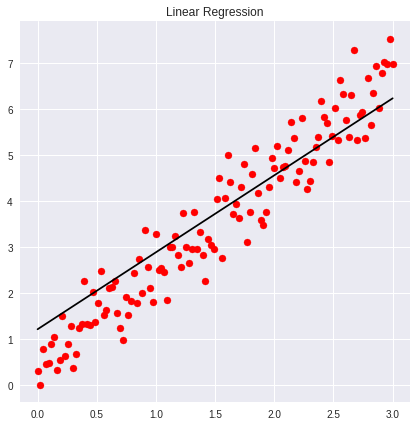

In [126]:
plt.style.use('seaborn')
plt.figure(figsize=(7,7))
plt.scatter(x,y,color='r',label='Original Data')
plt.plot(x,Linear_Model(x),label='Lineal Model',color='k')
plt.title('Linear Regression')
plt.grid(True)
plt.show()

# With Keras

In [127]:
data = pd.DataFrame(columns=['x','y'],data=zip(x,y))
data

,x,y
0,0.000000,0.299706
1,0.023256,0.014527
2,0.046512,0.782779
3,0.069767,0.468827
4,0.093023,0.485385
...,...,...
125,2.906977,6.774043
126,2.930233,7.028735
127,2.953488,6.984517
128,2.976744,7.531583


In [128]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(1,), activation='linear')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='mse',
metrics=['mse'],
optimizer=optimizer)

In [129]:
model.fit(x,y,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 22.6050 - mse: 22.6050
Epoch 2/100
5/5 [==============================] - 0s 977us/step - loss: 19.8992 - mse: 19.8992
Epoch 3/100
5/5 [==============================] - 0s 892us/step - loss: 17.8917 - mse: 17.8917
Epoch 4/100
5/5 [==============================] - 0s 776us/step - loss: 17.3953 - mse: 17.3953
Epoch 5/100
5/5 [==============================] - 0s 715us/step - loss: 14.8180 - mse: 14.8180
Epoch 6/100
5/5 [==============================] - 0s 778us/step - loss: 15.2085 - mse: 15.2085
Epoch 7/100
5/5 [==============================] - 0s 689us/step - loss: 13.5836 - mse: 13.5836
Epoch 8/100
5/5 [==============================] - 0s 699us/step - loss: 11.9080 - mse: 11.9080
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 11.6232 - mse: 11.6232
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 10.5659 - mse: 10.5659
Epoch 11/100
5/5 [===========================

In [130]:
y_pred = model.predict(x)

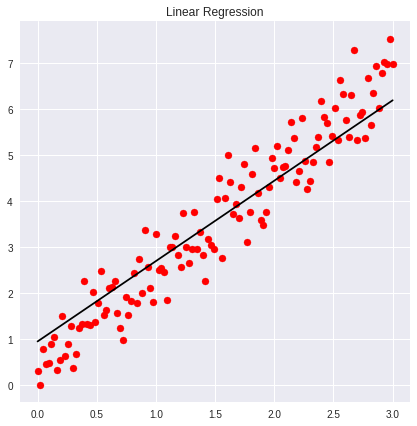

In [131]:
plt.style.use('seaborn')
plt.figure(figsize=(7,7))
plt.scatter(x,y,color='r',label='Original Data')
plt.plot(x,y_pred,label='Lineal Model',color='k')
plt.title('Linear Regression')
plt.grid(True)
plt.show()